In [1]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_excel('auto-mpg.xlsx')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

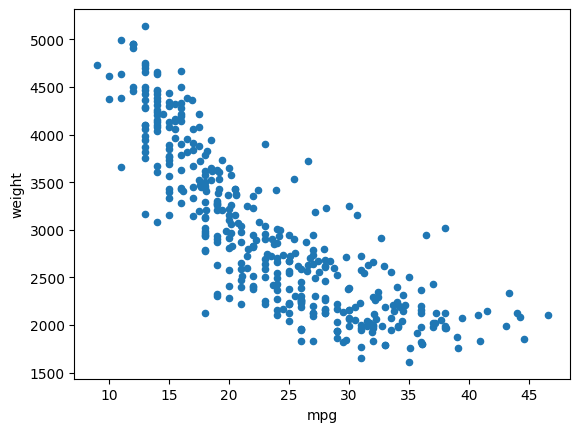

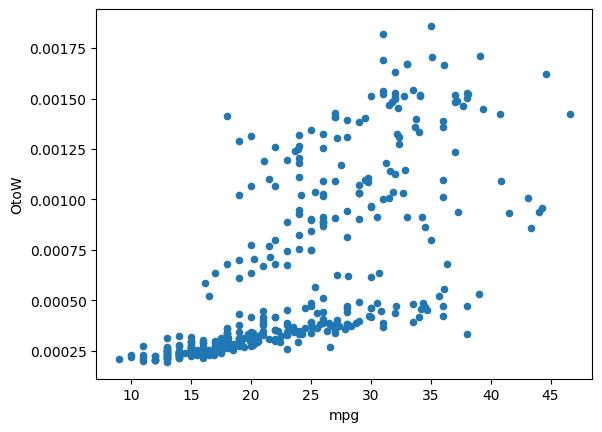

In [3]:
df.plot(kind='scatter', x='mpg', y='weight')
df['OtoW'] = df['origin'] / df['weight']
df.plot(kind='scatter', x='mpg', y='OtoW')
plt.show()

<Figure size 400x300 with 0 Axes>

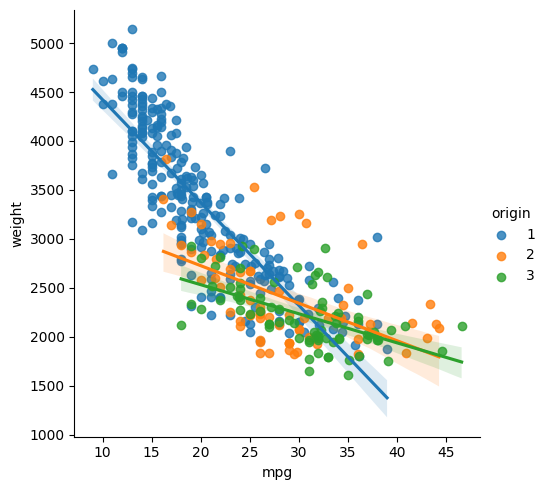

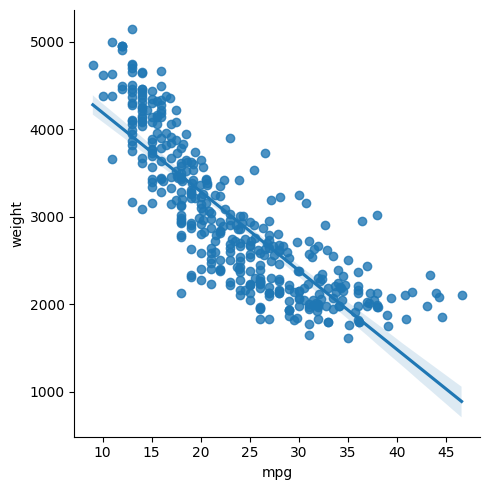

In [4]:
#모범답안
plt.figure(figsize=(4,3))
sns.lmplot(data=df, x='mpg', y='weight',hue='origin')
plt.show()
sns.lmplot(data=df, x='mpg', y='weight')
plt.show()

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상를 사용.

[Features]
- species: 펭귄의 종 (Adelie, Chinstrap, Gentoo)
- island: 데이터가 수집된 섬 (Biscoe, Dream, Torgersen)
- bill_length_mm: 부리 길이 (mm)
- bill_depth_mm: 부리 깊이 (mm)
- flipper_length_mm: 지느러미 길이 (mm)
- body_mass_g: 몸무게 (g)
- sex: 성별 (male, female)
- year: 데이터가 수집된 연도

[Species]
- Adelie: 아델리 펭귄
- Chinstrap: 턱끈펭귄
- Gentoo: 젠투펭귄

[수집된 섬]
- Biscoe
- Dream
- Torgersen

In [5]:
df_pg = sns.load_dataset('penguins')
df_pg


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
species = df_pg['species'].unique()
species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df_pg['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

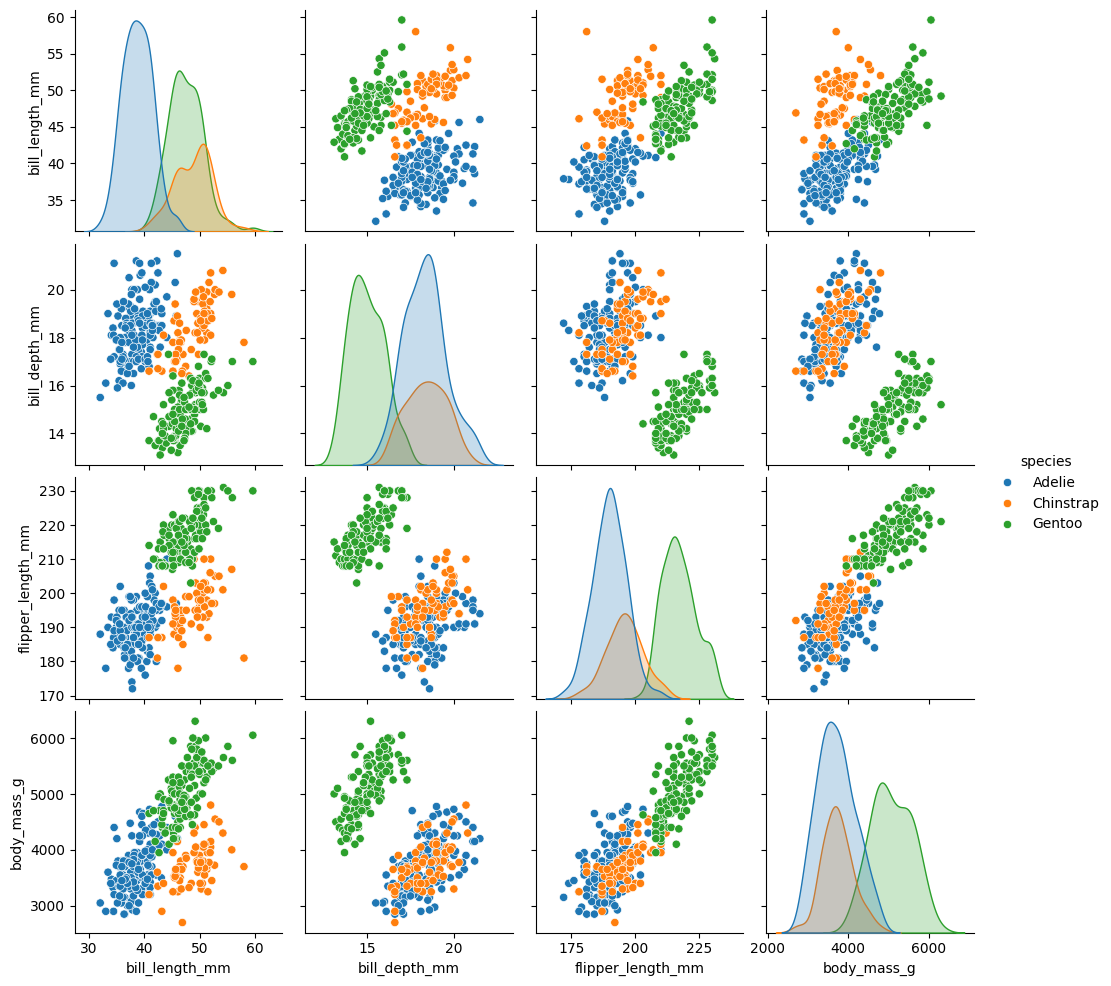

In [8]:
sns.pairplot(df_pg, hue='species')
plt.show()

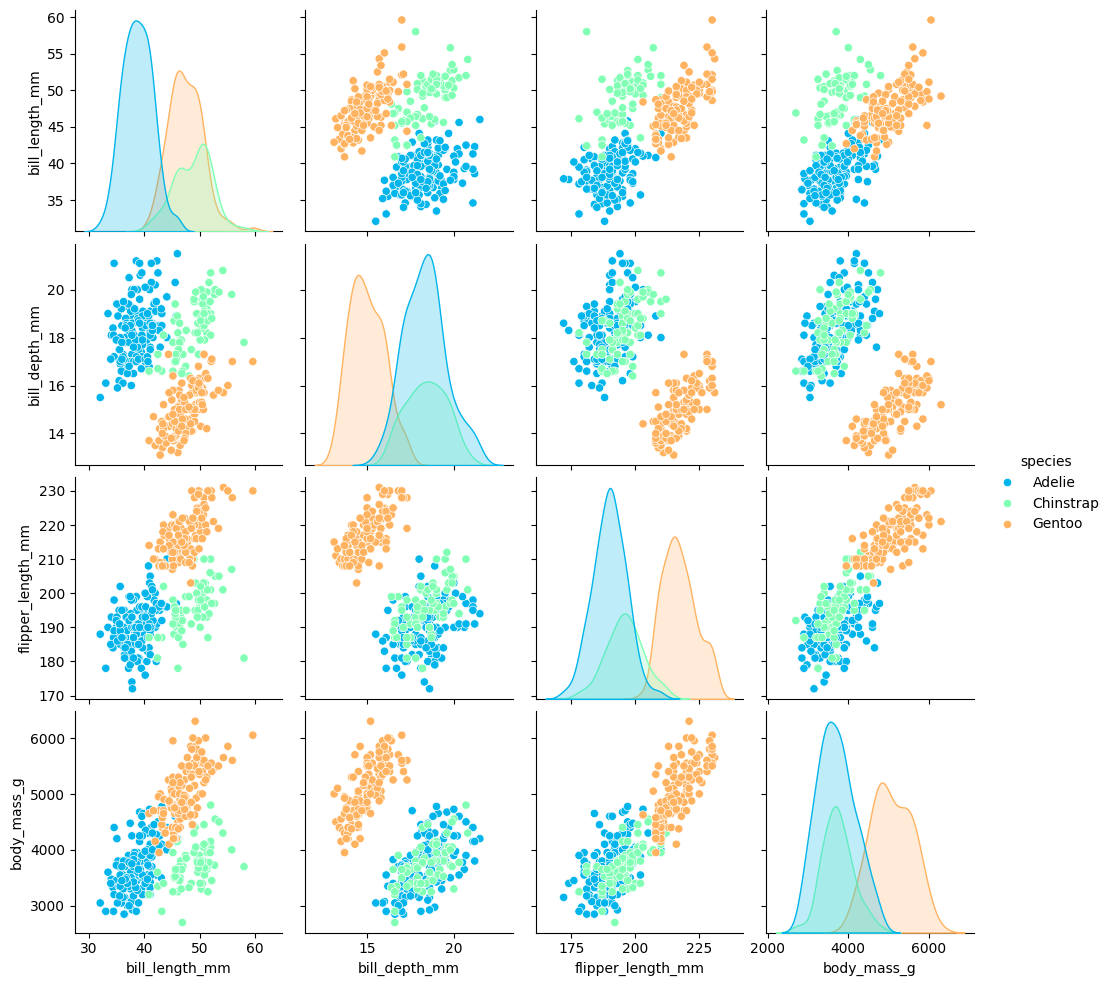

In [10]:
#답안 예시
sns.pairplot(df_pg[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g','species']], palette='rainbow',hue='species',diag_kind='kde')

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [ ]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


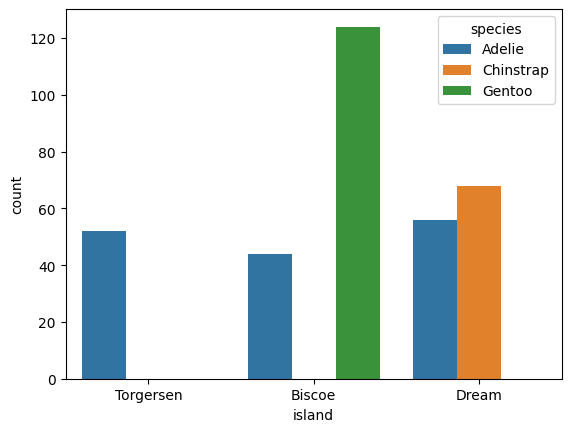

In [ ]:
sns.countplot(data=df_pg, x='island', hue='species')
plt.show()

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [11]:
df_ti = sns.load_dataset('titanic')
df_ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


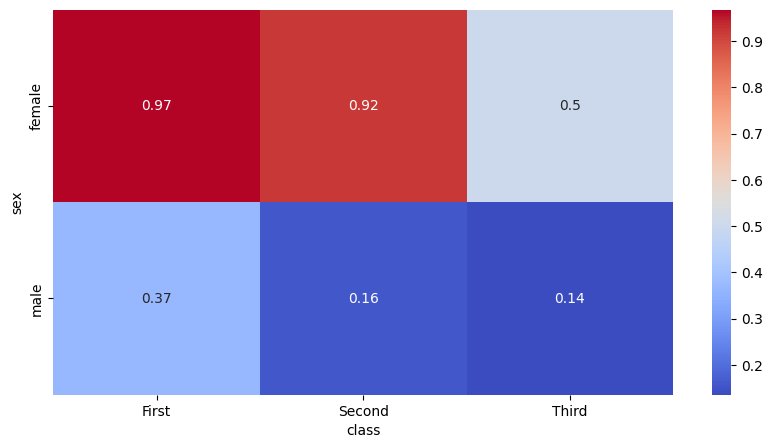

In [12]:
hit = df_ti.groupby(['sex', 'class'])['survived'].mean().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(hit, annot=True, cmap='coolwarm')
plt.show()

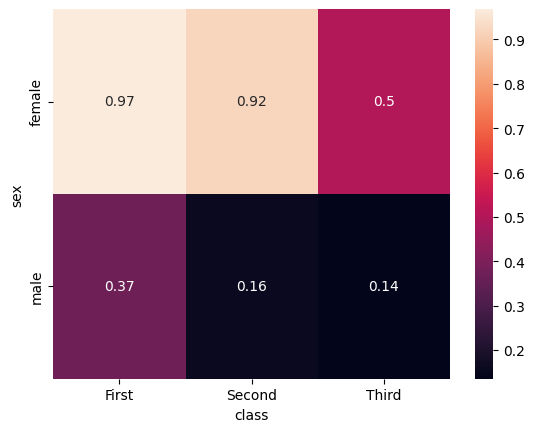

In [14]:
#정답 예시
pivot = pd.pivot_table(df_ti, index='sex', columns='class', values='survived',aggfunc=(lambda x : x.sum()/x.count()), fill_value=0)
sns.heatmap(pivot, annot=True)
plt.show()

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

In [ ]:
#타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.
df_ti = sns.load_dataset('titanic')
df_ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


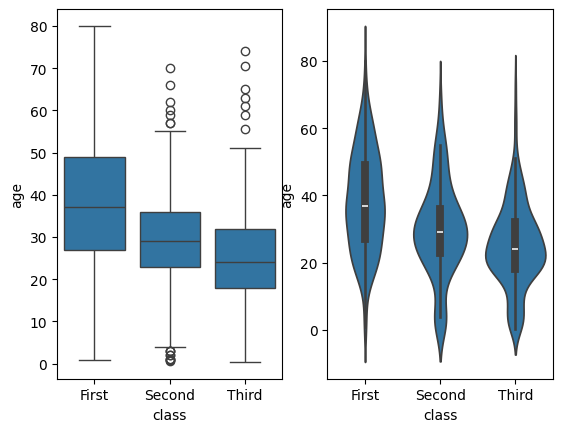

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(data=df_ti, x='class', y='age')
plt.subplot(1, 2, 2)
sns.violinplot(data=df_ti, x='class', y='age')
plt.show()

<Axes: xlabel='class', ylabel='age'>

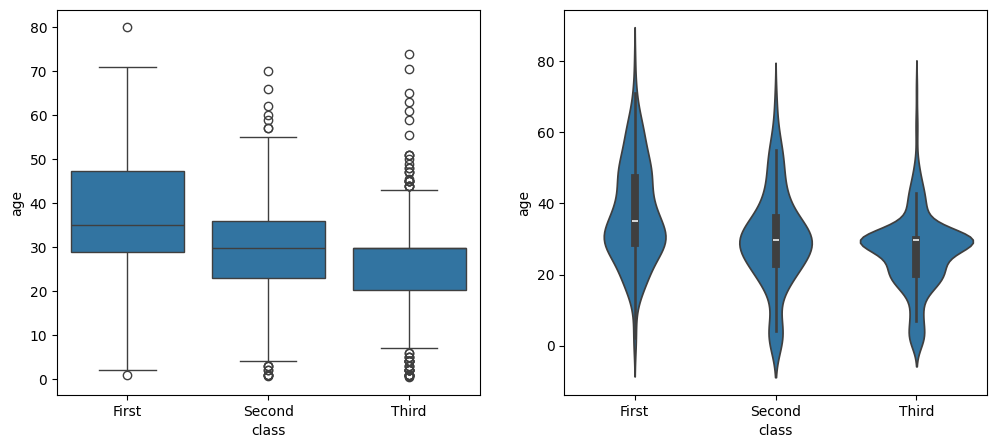

In [16]:
#정답 예시
import numpy as np
ttn = sns.load_dataset('titanic')
ttn['age'].replace(np.nan, ttn['age'].mean(), inplace = True)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=ttn, x='class', y='age')

plt.subplot(1, 2, 2)
sns.violinplot(data=ttn, x='class', y='age')